In [33]:
import json
from sentence_transformers import SentenceTransformer, util
import pandas as pd

model = SentenceTransformer("all-mpnet-base-v2")

In [4]:
with open("reqs_extraction/experiment_output/rag-lite-plannet-reqs-processed_v0.json") as f:
    data = json.load(f)

In [17]:
reqs = []
for datum in data:
    if 'processed_requirements' in datum:
        reqs.extend([x['Requirement*'] for x in datum['processed_requirements']])

In [ ]:
req_embeddings = [model.encode(req) for req in reqs]

In [ ]:
text_to_embed = [{'text': x, 'embedding': [float(z) for z in y]} for x,y in zip(reqs, req_embeddings)]
with open("~/internal_onclaive/onclaive/reqs_extraction/experiment_output/req_text_embedding.json", "w+") as f:
    json.dump(text_to_embed, f, indent=2)

In [4]:
with open("../../internal_onclaive/onclaive/reqs_extraction/experiment_output/req_text_embedding.json") as f:
    text_to_embed = json.load(f)

In [5]:
text_to_embed[0]

{'text': "Server SHALL support the CodeSystem 'DeliveryMethodCS' with URL 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/DeliveryMethodCS'",
 'embedding': [0.00697505846619606,
  0.016427630558609962,
  0.01356743648648262,
  -0.006002660840749741,
  -0.005992749705910683,
  0.031453993171453476,
  0.028404895216226578,
  0.043311625719070435,
  0.0025450580287724733,
  0.007476839702576399,
  0.03057660348713398,
  0.007559694815427065,
  0.01672084629535675,
  0.05317109078168869,
  0.015061195008456707,
  0.011600960046052933,
  -0.030413750559091568,
  0.05520075559616089,
  -0.06618881970643997,
  -0.0505419485270977,
  -0.016734007745981216,
  -0.009443833492696285,
  0.02026604861021042,
  -0.041308220475912094,
  0.04942717403173447,
  -0.028837870806455612,
  -0.03742273896932602,
  0.005713489837944508,
  -0.025584591552615166,
  -0.060709398239851,
  0.04221047833561897,
  0.0025893966667354107,
  0.06440418213605881,
  -0.055025700479745865,
  1.7966793848245288e-

In [13]:
datum.keys()

dict_keys(['file_name', 'chunk_index', 'total_chunks', 'chunk', 'response'])

In [ ]:
datakeys = set()
for datum in data:
    datakeys.add(frozenset(datum.keys()))

In [16]:
datakeys

{frozenset({'chunk', 'chunk_index', 'file_name', 'response', 'total_chunks'}),
 frozenset({'chunk',
            'chunk_index',
            'file_name',
            'llm_response',
            'processed_requirements',
            'response',
            'selected_examples',
            'total_chunks'}),
 frozenset({'chunk',
            'chunk_index',
            'file_name',
            'llm_response',
            'processed_requirements',
            'response',
            'selected_examples',
            'total_chunks',
            'unprocessable_requirements'})}

In [27]:
from itertools import product

for x in product(text_to_embed, text_to_embed):
    print(x)
    break

({'text': "Server SHALL support the CodeSystem 'DeliveryMethodCS' with URL 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/DeliveryMethodCS'", 'embedding': [0.00697505846619606, 0.016427630558609962, 0.01356743648648262, -0.006002660840749741, -0.005992749705910683, 0.031453993171453476, 0.028404895216226578, 0.043311625719070435, 0.0025450580287724733, 0.007476839702576399, 0.03057660348713398, 0.007559694815427065, 0.01672084629535675, 0.05317109078168869, 0.015061195008456707, 0.011600960046052933, -0.030413750559091568, 0.05520075559616089, -0.06618881970643997, -0.0505419485270977, -0.016734007745981216, -0.009443833492696285, 0.02026604861021042, -0.041308220475912094, 0.04942717403173447, -0.028837870806455612, -0.03742273896932602, 0.005713489837944508, -0.025584591552615166, -0.060709398239851, 0.04221047833561897, 0.0025893966667354107, 0.06440418213605881, -0.055025700479745865, 1.7966793848245288e-06, -0.03413321077823639, 0.02912859246134758, 0.03975401446223259, 

In [30]:
prod_list = list(product(text_to_embed, text_to_embed))

423801

## Cartesian Product of Cosine Similarity

In [ ]:
scored_prod_list = [['Requirement1', "Requirement2", "Similarity Score"]]
for i, prod in enumerate(prod_list):
    counter = i+1
    if counter % 10000 == 0:
        print(f"Pair {counter} of {len(prod_list)}")
    if prod[0]['text'] != prod[1]['text']:
        emb0 = prod[0]['embedding']
        emb1 = prod[1]['embedding']
        score = float(util.pytorch_cos_sim(emb0, emb1)[0][0])
        scored_prod_list.append([prod[0]['text'], prod[1]['text'], score])
print(f"Pair {counter} of {len(prod_list)}")

Pair 1000 of 423801
Pair 2000 of 423801
Pair 3000 of 423801
Pair 4000 of 423801
Pair 5000 of 423801
Pair 6000 of 423801
Pair 7000 of 423801
Pair 8000 of 423801
Pair 9000 of 423801
Pair 10000 of 423801
Pair 11000 of 423801
Pair 12000 of 423801
Pair 13000 of 423801
Pair 14000 of 423801
Pair 15000 of 423801
Pair 16000 of 423801
Pair 17000 of 423801
Pair 18000 of 423801
Pair 19000 of 423801
Pair 20000 of 423801
Pair 21000 of 423801
Pair 22000 of 423801
Pair 23000 of 423801
Pair 24000 of 423801
Pair 25000 of 423801
Pair 26000 of 423801
Pair 27000 of 423801
Pair 28000 of 423801
Pair 29000 of 423801
Pair 30000 of 423801
Pair 31000 of 423801
Pair 32000 of 423801
Pair 33000 of 423801
Pair 34000 of 423801
Pair 35000 of 423801
Pair 36000 of 423801
Pair 37000 of 423801
Pair 38000 of 423801
Pair 39000 of 423801
Pair 40000 of 423801
Pair 41000 of 423801
Pair 42000 of 423801
Pair 43000 of 423801
Pair 44000 of 423801
Pair 45000 of 423801
Pair 46000 of 423801
Pair 47000 of 423801
Pair 48000 of 423801
P

In [ ]:
df = pd.DataFrame(scored_prod_list[1:], columns=scored_prod_list[0])
df.head()

,Requirement1,Requirement2,Similarity Score
0,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.504868
1,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.520903
2,Server SHALL support the CodeSystem 'DeliveryM...,Servers SHALL support searching OrganizationAf...,0.279096
3,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.252866
4,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.198458


<Axes: >

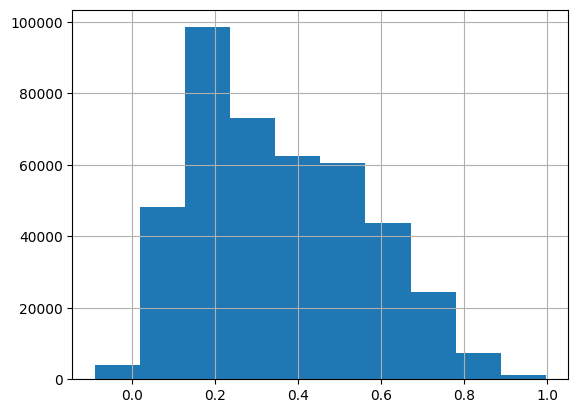

In [44]:
df["Similarity Score"].hist()

In [45]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

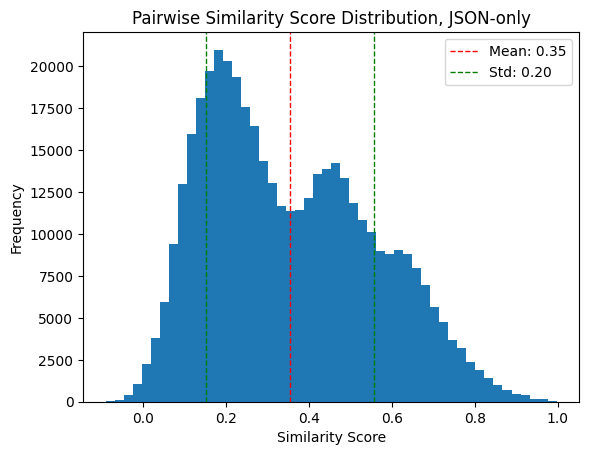

In [58]:
avg = np.mean(df['Similarity Score'])
std = np.std(df['Similarity Score'])

n, bins, patches = plt.hist(df['Similarity Score'], bins=50)

plt.axvline(avg, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {avg:.2f}')
plt.axvline(avg + std, color='g', linestyle='dashed', linewidth=1, label=f'Std: {std:.2f}')
plt.axvline(avg - std, color='g', linestyle='dashed', linewidth=1)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Pairwise Similarity Score Distribution, JSON-only')
plt.legend()
plt.savefig("jsononlyscores.pdf",bbox_inches="tight")
plt.show()

In [51]:
from scipy import stats

iqr = stats.iqr(df['Similarity Score'])

In [53]:
iqr*2*(df.shape[0]**(1/3))

47.472410139674984

In [59]:
df

,Requirement1,Requirement2,Similarity Score
0,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.504868
1,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.520903
2,Server SHALL support the CodeSystem 'DeliveryM...,Servers SHALL support searching OrganizationAf...,0.279096
3,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.252866
4,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.198458
...,...,...,...
422983,The Extension SHALL NOT have a value[x],Extension:daysOfWeek.value[x] SHALL be bound t...,0.378213
422984,The Extension SHALL NOT have a value[x],Extension:allDay SHALL have a value[x] of type...,0.524188
422985,The Extension SHALL NOT have a value[x],Extension:availableStartTime SHALL have a valu...,0.480116
422986,The Extension SHALL NOT have a value[x],Extension:availableEndTime SHALL have a value[...,0.519040


In [60]:
df.to_csv("requirement_similarity.csv")

In [6]:
df = pd.read_csv("requirement_similarity.csv").iloc[:,1:]

In [7]:
df.head()

,Requirement1,Requirement2,Similarity Score
0,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.504868
1,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.520903
2,Server SHALL support the CodeSystem 'DeliveryM...,Servers SHALL support searching OrganizationAf...,0.279096
3,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.252866
4,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.198458


In [10]:
df.shape

(422988, 3)

In [8]:
df.drop_duplicates(subset=['Requirement1', 'Requirement2'])

,Requirement1,Requirement2,Similarity Score
0,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.504868
1,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.520903
2,Server SHALL support the CodeSystem 'DeliveryM...,Servers SHALL support searching OrganizationAf...,0.279096
3,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.252866
4,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.198458
...,...,...,...
422983,The Extension SHALL NOT have a value[x],Extension:daysOfWeek.value[x] SHALL be bound t...,0.378213
422984,The Extension SHALL NOT have a value[x],Extension:allDay SHALL have a value[x] of type...,0.524188
422985,The Extension SHALL NOT have a value[x],Extension:availableStartTime SHALL have a valu...,0.480116
422986,The Extension SHALL NOT have a value[x],Extension:availableEndTime SHALL have a value[...,0.519040


In [15]:
subdf = df.loc[:,['Requirement1', 'Requirement2']]

dupes = subdf.T.apply(sorted).T.duplicated()

deduped = df[~dupes]

deduped.head()

,Requirement1,Requirement2,Similarity Score
0,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.504868
1,Server SHALL support the CodeSystem 'DeliveryM...,The DeliveryMethodCS CodeSystem SHALL include ...,0.520903
2,Server SHALL support the CodeSystem 'DeliveryM...,Servers SHALL support searching OrganizationAf...,0.279096
3,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.252866
4,Server SHALL support the CodeSystem 'DeliveryM...,The 'specialty' search parameter for Organizat...,0.198458


In [ ]:
cutoffs = [0.8, 0.85, 0.9, 0.95]
reqs = deduped.Requirement1.unique()
for cutoff in cutoffs:
    subdf = deduped[deduped["Similarity Score"].astype(float) >= cutoff]
    group_map = {}
    for req in reqs:
        group_actions = subdf[(subdf.Requirement1 == req)|(subdf.Requirement2 == req)]
        if group_actions.shape[0] == 0:
            group_map[req] = set([req])
        else:
            for _, group_action in group_actions.iterrows():
                if (group_action.Requirement1 in group_map) and not (group_action.Requirement2 in group_map):
                    group_to_update = 
        

## K-Means Clustering


In [6]:
from sklearn.cluster import KMeans

X = [x['embedding'] for x in text_to_embed]

kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto").fit(X)

In [16]:
clusters = {}
for i, label in enumerate(kmeans.labels_):
    cluster = clusters.get(label, [])
    cluster.append(text_to_embed[i])
    clusters[label] = cluster

In [90]:
for i, cluster in clusters.items():
    print(f"Cluster {i+1}: \nSize: {len(cluster)}\nExamples:\n")
    for c in cluster[:10]:
        print(c['text'])
    print("__"*40,"\n")

Cluster 1: 
Size: 159
Examples:

Server SHALL support the CodeSystem 'DeliveryMethodCS' with URL 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/DeliveryMethodCS'
The DeliveryMethodCS CodeSystem SHALL include the code 'virtual' with display 'Virtual' and definition 'Delivery not requiring provider and patient to be physically co-located, such as tele-medicine'
The DeliveryMethodCS CodeSystem SHALL include the code 'physical' with display 'Physical' and definition 'Traditional delivery requiring provider and patient to be physically co-located.'
The CodeSystem QualificationStatusCS SHALL define the following codes: active, inactive, issiner, revoked, pending, unknown
The CodeSystem QualificationStatusCS SHALL have a url of 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/QualificationStatusCS'
The CodeSystem QualificationStatusCS SHALL be case-sensitive
The CodeSystem QualificationStatusCS SHALL have a content value of 'complete'
Servers SHALL support the InsurancePlanT

In [24]:
import umap
import umap.plot

/Users/jrockhill/miniconda3/envs/ONCL310/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/Users/jrockhill/miniconda3/envs/ONCL310/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/Users/jrockhill/miniconda3/envs/ONCL310/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for

In [28]:
mapper = umap.UMAP().fit(X)

/Users/jrockhill/miniconda3/envs/ONCL310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

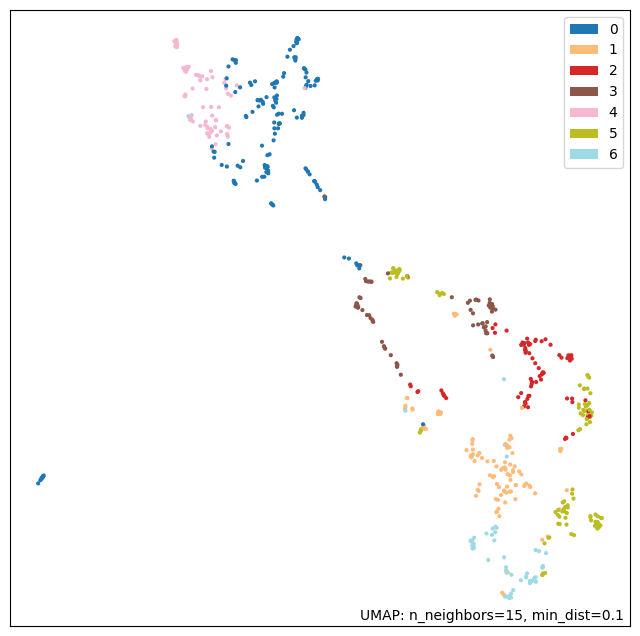

In [ ]:
umap.plot.points(mapper, labels=kmeans.labels_, theme="blue")

In [32]:
kmeans_exp = {}
kmeans_exp['umap'] = mapper
for n_means in range(5,11):
    exp = {}
    exp['kmeans'] = KMeans(n_clusters=n_means, random_state=42+n_means, n_init="auto").fit(X)
    exp['clusters'] = {}
    for i, label in enumerate(exp['kmeans'].labels_):
        cluster = exp['clusters'].get(label, [])
        cluster.append(text_to_embed[i])
        exp['clusters'][label] = cluster

## Known Centroid Clustering

In [57]:
resource_profiles = [
    "Name: Endpoint\n\tDefinition: The technical details of an endpoint that can be used for electronic services, such as a portal or FHIR REST services, messaging or operations, or DIRECT messaging.",
    "Name: HealthcareService\n\tDefinition: The HealthCareService resource typically describes services offered by an organization/practitioner at a location. The resource may be used to encompass a variety of services covering the entire healthcare spectrum, including promotion, prevention, diagnostics, pharmacy, hospital and ambulatory care, home care, long-term care, and other health-related and community services.",
    "Name: InsurancePlan\n\tDefinition: An InsurancePlan is a discrete package of health insurance coverage benefits that are offered under a particular network type. A given payer’s products typically differ by network type and/or covered benefits. A plan pairs a product’s covered benefits with the particular cost sharing structure offered to a consumer. A given product may comprise multiple plans (i.e. each plan offers different cost sharing requirements for the same set of covered benefits).\nInsurancePlan describes a health insurance offering comprised of a list of covered benefits (i.e. the product), costs associated with those benefits (i.e. the plan), and additional information about the offering, such as who it is owned and administered by, a coverage area, contact information, etc.",
    "Name: Plan-Net Location\n\tDefinition: A Location is the physical place where healthcare services are provided, practitioners are employed, organizations are based, etc. Locations can range in scope from a room in a building to a geographic region/area.",
    "Name: Plan-Net Network\n\tDefinition: A Network refers to a healthcare provider insurance network. A healthcare provider insurance network is an aggregation of organizations and individuals that deliver a set of services across a geography through health insurance products/plans. A network is typically owned by a payer.\nIn the PlanNet IG, individuals and organizations are represented as participants in a PLan-Net Network through the practitionerRole and Plan-Net-organizationAffiliation resources, respectively.",
    "Name: Plan-Net Organization\n\tDefinition: An organization is a formal or informal grouping of people or organizations with a common purpose, such as a company, institution, corporation, community group, or healthcare practice. Guidance: When the contact is a department name, rather than a human (e.g., patient help line), include a blank family and given name, and provide the department name in contact.name.text",
    "Name: Plan-Net OrganizationAffiliation\n\tDefinition The OrganizationAffiliation resource describes relationships between two or more organizations, including the services one organization provides another, the location(s) where they provide services, the availability of those services, electronic endpoints, and other relevant information.",
    "Name: Plan-Net Practitioner\n\tDefinition: Practitioner is a person who is directly or indirectly involved in the provisioning of healthcare.",
    "Name: Plan-Net PractitionerRole\n\tDefinition: PractionerRole describes details about a provider, which can be a practitioner or an organization. When the provider is a practitioner, there may be a relationship to an organization. A provider renders services to patients at a location. When the provider is a practitioner, there may also be a relationship to an organization. Practitioner participation in healthcare provider insurance networks may be direct or through their role at an organization."
]

centroids = [model.encode(profile) for profile in resource_profiles]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
seeded_groups = {}
group_labels = []
for i, centroid in enumerate(centroids):
    seeded_groups[i] = {"centroid_text": resource_profiles[i], "requirements": []}
for j, embedding in enumerate(X):
    min_score = None
    min_centroid_i = None
    for i, centroid in enumerate(centroids):
        score = -float(util.euclidean_sim(embedding, centroid)[0][0])
        if (min_score is None) or (score < min_score):
            min_score = score
            min_centroid_i = i
    seeded_groups[min_centroid_i]['requirements'].append(text_to_embed[j]['text'])
    group_labels.append(min_centroid_i)
    

In [91]:
for i, group in seeded_groups.items():
    print(f"Cluster {i+1} - {group['centroid_text']}: \nSize: {len(group['requirements'])}\nExamples:\n")
    for req in group['requirements'][:10]:
        print(req)
    print("__"*40,"\n")

Cluster 1 - Name: Endpoint
Definition: The technical details of an endpoint that can be used for electronic services, such as a portal or FHIR REST services, messaging or operations, or DIRECT messaging.: 
Size: 46
Examples:

Endpoint.meta.lastUpdated SHALL be present
Endpoint.status SHALL be fixed to the code 'active'
Endpoint.connectionType SHALL be present
Endpoint.connectionType SHALL be bound to the EndpointConnectionTypeVS value set (extensible)
Endpoint.payloadType SHALL be present
Endpoint.payloadType SHALL have a maximum cardinality of 1
Endpoint.payloadType SHALL be bound to the EndpointPayloadTypeVS value set (extensible)
Endpoint.address SHALL be present
The CodeSystem with url 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/EndpointConnectionTypeCS' SHALL define the code 'rest-non-fhir' with display 'REST (not FHIR)' and definition 'Interact with a server using HTTP/REST but not FHIR.  Should be used for web portals.'
The CodeSystem with url 'http://hl7.org/fhir/u

In [54]:
np.array(group_labels).shape

(651,)

<Axes: >

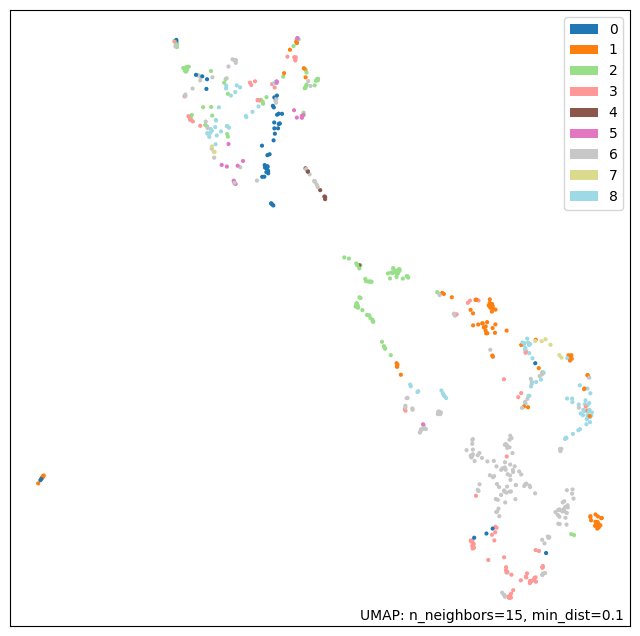

In [55]:
umap.plot.points(mapper, labels=np.array(group_labels), theme="blue")

## LLM-Based sorting based on Predefined Groups

In [88]:
# 1. IMPORTS AND BASIC SETUP
import base64
import json
import logging
from typing import List, Dict, Tuple, Union, Optional, Any
from dataclasses import dataclass
import os
import time
import threading
from IPython.display import Image
import math
import io
import re
import pandas as pd
from json_repair import repair_json
from langchain_community.document_loaders import BSHTMLLoader
import shutil
from dotenv import load_dotenv
import httpx
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tenacity import retry, wait_exponential, stop_after_attempt, retry_if_exception_type
from anthropic import RateLimitError
from anthropic import Anthropic
import google.generativeai as gemini
from openai import OpenAI
import httpx


# Basic setup
logging.basicConfig(level=logging.INFO)
load_dotenv()

# Constants
CERT_PATH = '/Users/jrockhill/miniconda3/envs/ONCL310/lib/python3.10/site-packages/pip/_vendor/certifi/cacert.pem'

API_CONFIGS = {
    "claude": {
        "model_name": "claude-3-5-sonnet-20240620",
        "max_tokens": 32,
        "temperature": 0.7,
        "batch_size": 3,
        "delay_between_chunks": 2,
        "delay_between_batches": 10,
        "requests_per_minute": 25,
        "max_requests_per_day": 5000,
        "delay_between_requests": 2
    }
}

SYSTEM_PROMPTS = {
    "claude": """You are a seasoned Healthcare Integration Test Engineer 
                analyzing a FHIR Implementation Guide to extract precise testable requirements."""
}

def create_rate_limiter():
    """Create a rate limiter state dictionary for all APIs"""
    return {
        api: {
            'requests': [],
            'daily_requests': 0,
            'last_reset': time.time()
        }
        for api in API_CONFIGS.keys()
    }

def check_rate_limits(rate_limiter: dict, api: str):
    """Check and wait if rate limits would be exceeded"""
    if api not in rate_limiter:
        raise ValueError(f"Unknown API: {api}")
        
    now = time.time()
    state = rate_limiter[api]
    config = API_CONFIGS[api]
    
    # Reset daily counts if needed
    day_seconds = 24 * 60 * 60
    if now - state['last_reset'] >= day_seconds:
        state['daily_requests'] = 0
        state['last_reset'] = now
    
    # Check daily limit
    if state['daily_requests'] >= config['max_requests_per_day']:
        raise Exception(f"{api} daily request limit exceeded")
    
    # Remove old requests outside the current minute
    state['requests'] = [
        req_time for req_time in state['requests']
        if now - req_time < 60
    ]
    
    # Wait if at rate limit
    if len(state['requests']) >= config['requests_per_minute']:
        sleep_time = 60 - (now - state['requests'][0])
        if sleep_time > 0:
            time.sleep(sleep_time)
        state['requests'] = state['requests'][1:]
    
    # Add minimum delay between requests
    if state['requests'] and now - state['requests'][-1] < config['delay_between_requests']:
        time.sleep(config['delay_between_requests'])
    
    # Record this request
    state['requests'].append(now)
    state['daily_requests'] += 1

def format_content_for_api(content: Union[str, dict, list], api_type: str) -> str:
    """Format content appropriately for each API"""
    
    # Create the base requirements extraction prompt
    base_prompt = create_prompt(content)
    
    if api_type == "claude":
        return [{
            "type": "text",
            "text": base_prompt
        }]
    
    # For other APIs, return just the text
    return base_prompt

@retry(
    wait=wait_exponential(multiplier=1, min=4, max=60),
    stop=stop_after_attempt(5),
    retry=retry_if_exception_type((RateLimitError, TimeoutError))
)
def make_api_request(client, api_type: str, content: Union[str, dict, list], rate_limit_func) -> str:
    """Make rate-limited API request with retries"""
    rate_limit_func()
    
    config = API_CONFIGS[api_type]
    formatted_content = format_content_for_api(content, api_type)
    
    try:
        if api_type == "claude":
            response = client.messages.create(
                model=config["model_name"],
                max_tokens=config["max_tokens"],
                messages=[{
                    "role": "user", 
                    "content": formatted_content
                }],
                system=SYSTEM_PROMPTS[api_type]
            )
            return response.content[0].text
            
    except Exception as e:
        logging.error(f"Error in {api_type} API request: {str(e)}")
        raise

def setup_clients():
    """Initialize clients for LLM service"""
    try:
        # Claude setup
        verify_path = CERT_PATH if os.path.exists(CERT_PATH) else True
        http_client = httpx.Client(verify=verify_path, timeout=60.0)
        claude_client = Anthropic(
            api_key=os.getenv('ANTHROPIC_API_KEY'),
            http_client=http_client
        )
        
        return {
            "claude": claude_client,
        }
        
    except Exception as e:
        logging.error(f"Error setting up clients: {str(e)}")
        raise

def process_all_content(api_type: str, reqs: list[str]) -> Tuple[Dict[str, Any], list]:
    """Process all content and generate requirements in Inferno format"""
    clients = setup_clients()
    client = clients[api_type]
    config = API_CONFIGS[api_type]
    rate_limiter = create_rate_limiter()
    
    groups = {}
    labels = []
    def check_limits():
        check_rate_limits(rate_limiter, api_type)
    for req in reqs:
        try:
            response = make_api_request(client, api_type, req, check_limits)
            profile = process_llm_output(response, labels)
            
            group = groups.get(profile, [])
            group.append([req, response]) 

            groups[profile] = group
            
        except Exception as e:
            logging.error(f"Error processing content: {str(e)}")

    return groups, labels

In [85]:
def create_prompt(content):
    prompt = f"""Your task is to determine which of the resource profiles defined in the Plan-Net implementaiton guide (IG) is the most similar to a given requirement which has been extracted from the same IG.\nYou will be presented with a requirement that will be marked with the <REQUIREMENT> tag. Your response must take the form of one of the tags used to mark the following resource profiles, given below. Do not include any explanation or other extraneous text in your response.\n"""
    for i, profile in enumerate(resource_profiles):
        prompt += f"<PROFILE_{i+1}>\n\t{profile}\n</PROFILE_{i+1}>\n"
    prompt += f"<REQUIREMENT>\n\t{content}\n</REQUIREMENT>\nRESPONSE:\n"
    return prompt

def process_llm_output(output, labels):
    profile_search = re.search(r"<PROFILE_[1-9]>", output)
    if profile_search is not None:
        profile = profile_search[0]
    else:
        profile = "<UNKNOWN>"
    labels.append(profile)
    return profile

In [96]:
type(results['claude'])

tuple

In [93]:
print(create_prompt("test"))

Your task is to determine which of the resource profiles defined in the Plan-Net implementaiton guide (IG) is the most similar to a given requirement which has been extracted from the same IG.
You will be presented with a requirement that will be marked with the <REQUIREMENT> tag. Your response must take the form of one of the tags used to mark the following resource profiles, given below. Do not include any explanation or other extraneous text in your response.
<PROFILE_1>
	Name: Endpoint
	Definition: The technical details of an endpoint that can be used for electronic services, such as a portal or FHIR REST services, messaging or operations, or DIRECT messaging.
</PROFILE_1>
<PROFILE_2>
	Name: HealthcareService
	Definition: The HealthCareService resource typically describes services offered by an organization/practitioner at a location. The resource may be used to encompass a variety of services covering the entire healthcare spectrum, including promotion, prevention, diagnostics, ph

In [ ]:
apis = ["claude"]
results = {}
text = [x['text'] for x in text_to_embed]
for api_type in apis:
    logging.info(f"Processing with {api_type}...")
    results[api_type] = process_all_content(api_type, text)
    

INFO:root:Processing with claude...
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
INFO:httpx:HTTP Re

FileNotFoundError: [Errno 2] No such file or directory: 'reqs_clustering/Clustered_Requirements_claude1.json'

In [119]:
# Save results
output_file = os.path.join("reqs_clustering", f"Clustered_Requirements_{api_type}1.json")
with open(f"Clustered_Requirements_{api_type}1.json", 'w+') as f:
    json.dump(results[api_type], f, indent=2)
logging.info(f"Saved {api_type} results to {output_file}")

INFO:root:Saved claude results to reqs_clustering/Clustered_Requirements_claude1.json


In [101]:
for i, group_name in enumerate(list(sorted(results['claude'][0].keys()))):
    group = results['claude'][0][group_name]
    print(f"{group_name} - {resource_profiles[i]}: \nSize: {len(group)}\nExamples:\n")
    for req in group[:10]:
        print(req[0])
    print("__"*40,"\n")

<PROFILE_1> - Name: Endpoint
	Definition: The technical details of an endpoint that can be used for electronic services, such as a portal or FHIR REST services, messaging or operations, or DIRECT messaging.: 
Size: 97
Examples:

Extension.value[x] SHALL be present.
The Extension.value[x] element SHALL be present.
The Extension SHALL NOT have any nested extensions (Extension.extension element has a max cardinality of 0).
The Plan-Net Server SHALL support all profiles defined in this Implementation Guide.
The Plan-Net Server SHALL implement the RESTful behavior according to the FHIR specification.
The Plan-Net Server SHALL return the following response classes: (Status 400): invalid parameter, (Status 401/4xx): unauthorized request, (Status 403): insufficient scope, (Status 404): unknown resource, (Status 410): deleted resource.
The Plan-Net Server SHALL support json source formats for all Plan-Net interactions.
The Plan-Net Server SHALL support the searchParameters on each profile indiv

In [ ]:
llm_names = list(sorted(results['claude'][0].keys()))
group_comp = {}
for i, profile in enumerate(resource_profiles):
    
    print(profile)
    llm_group = group = results['claude'][0][llm_names[i]]
    print(f"\nLLM Group - Size: {len(llm_group)}")
    # for req in llm_group[:10]:
    #     print(req[0])
    seeded_group = seeded_groups[i]
    print(f"Clustering Group - Size: {len(seeded_group['requirements'])}")
    # for req in seeded_group['requirements'][:10]:
    #     print(req)

    llm_set = set([x[0] for x in llm_group])
    seeded_set = set(seeded_group['requirements'])

    common_set = llm_set.intersection(seeded_set)
    llm_only = llm_set.difference(seeded_set)
    seeded_only = seeded_set.difference(llm_set)
    print(f"\nNumber of requirements in common: {len(common_set)}\n")
    for req in list(common_set)[:10]:
        print(req)

    print(f"\n\nNumber of requirements in llm group only: {len(llm_only)}\n")
    for req in list(llm_only)[:10]:
        print(req)

    print(f"\n\nNumber of requirements in seeded group only: {len(seeded_only)}\n")
    for req in list(seeded_only)[:10]:
        print(req)

    print("\n","__"*40,"\n\n")

    comp = {"profile": profile}

    

Name: Endpoint
	Definition: The technical details of an endpoint that can be used for electronic services, such as a portal or FHIR REST services, messaging or operations, or DIRECT messaging.

LLM Group - Size: 97
Clustering Group - Size: 46

Number of requirements in common: 32

The CodeSystem EndpointPayloadTypeCS SHALL be case-sensitive.
The EndpointUsecase extension SHALL have a 'type' extension.
Endpoint.status SHALL be fixed to the code 'active'
The CodeSystem with url 'http://hl7.org/fhir/us/davinci-pdex-plan-net/CodeSystem/EndpointConnectionTypeCS' SHALL have content marked as 'complete'
The contactpoint-availabletime extension MAY have an availableStartTime sub-extension with a value[x] of type time
Endpoint.payloadType SHALL be present
Endpoint.connectionType SHALL be bound to the EndpointConnectionTypeVS ValueSet with an extensible binding strength
Endpoint.payloadType SHALL be bound to the EndpointPayloadTypeVS ValueSet with an extensible binding strength
The EndpointUseca